In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from numpy import random
from random import randint
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv(r"C:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\voice.csv")
columns = data.columns.tolist()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [3]:
#female için 1 male için 0 digit
data.label = [1 if each == "female" else 0 for each in data.label]

data.info()
#label row object dtype iken int64'e döndü

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [4]:
#test-train verileri için x ve y'ler
y = data.label.values
x_data = data.drop(["label"],axis=1)

#norm
x = (x_data - np.min(x_data)) / (np.max(x_data)).values



x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

#test_size=0.2 means %20 test datas, %80 train datas
#Sonuçların görselleştirilmesi için
method_names = []
method_scores = []

c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


K NEAREST NEIGHBORS 

K Değeri = 3 için;

Score for Number of Neighbors = 3: 0.9779179810725552


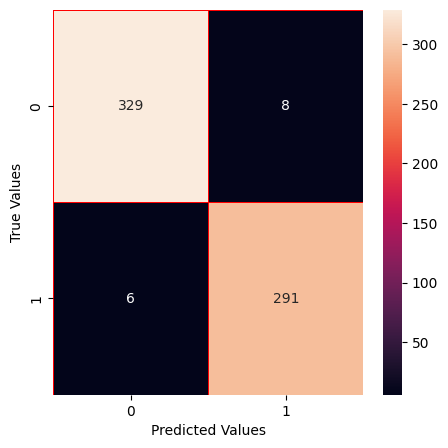

In [5]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("Score for Number of Neighbors = 3: {}".format(knn.score(x_test,y_test)))
method_names.append("KNN_3")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

En iyi K değerini bulma;

Text(0, 0.5, 'score')

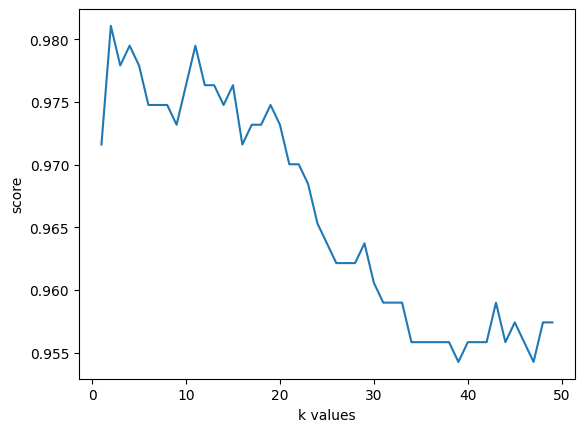

In [6]:
score_list=[]
for each in range(1,50):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,50),score_list)
plt.xlabel("k values")
plt.ylabel("score")

0-5 arası gözlemlenir

Text(0, 0.5, 'score')

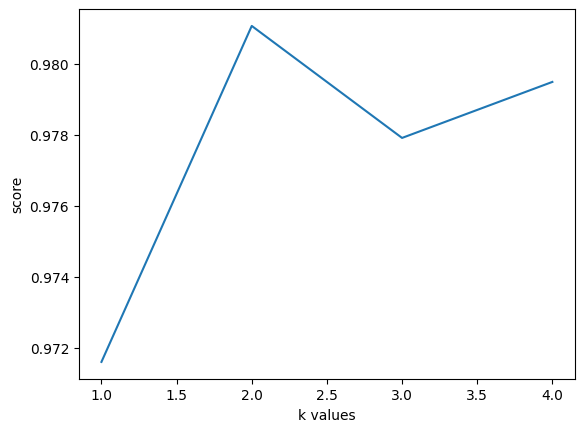

In [7]:
score_list=[]
for each in range(1,5):
    knn2 = KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,5),score_list)
plt.xlabel("k values")
plt.ylabel("score")

K değeri en iyi K=2 olarak belirlendi.

KNN

In [8]:
def KNN():
    knn = KNeighborsClassifier(n_neighbors=2)

    #test-train verileri için x ve y'ler
    x_data = data.drop(["label"],axis=1)
    x = (x_data - np.min(x_data)) / (np.max(x_data)).values
    y = data.label.values

    #normalization
    x = (x_data - np.min(x_data)) / (np.max(x_data)).values

    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
    #test_size=0.2 means %20 test datas, %80 train datas
    
    knn.fit(x_train,y_train)
    
    print("Score for Number of Neighbors = 2: {}".format(knn.score(x_test,y_test)))
    # score = knn.score(x_test,y_test)

    #Sonuçlar için ortak dizide toplanır.
    method_names.append("KNN_BEST(2)")
    method_scores.append(knn.score(x_test,y_test))

    #Confusion Matrix
    y_pred = knn.predict(x_test)
    conf_mat = confusion_matrix(y_test,y_pred)

    #Visualization Confusion Matrix
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()

KNN WITH HC

In [12]:
def KNN_With_HC():
    min = 0
    max = 0
    knn = KNeighborsClassifier(n_neighbors=2)
    for i in range(0,1000):
        random_selected_column = random.choice(columns, randint(1 , 20))
        x_data = data.drop(["label"],axis=1)
        x = (x_data - np.min(x_data)) / (np.max(x_data)).values
        x = data[random_selected_column].values
        y = data.label.values
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
        if(len(x_train) != 0 and len(y_train) !=0):
            knn.fit(x_train,y_train)
            y_pred = knn.predict(x_test)
            score = knn.score(x_test,y_test)
            
            if(i == 0):
                min = score
                max = score
            if(score>max):
                max = score
            if(score<min):
                min=score
            
    method_names.append("KNN_HC")
    method_scores.append(max)
    print("Min Score With HC for Number of Neighbors = 2: %.6f" % (min*100))
    print("Max Score With HC for Number of Neighbors = 2: %.6f" % (max*100))


KNN WITH SA

In [13]:
def KNN_With_SA():
    def objective_function(solution):
        knn = KNeighborsClassifier(n_neighbors=2)
        if(sum(solution)==0):
            return 0
        knn.fit(x_train,y_train)
        score = knn.score(x_test,y_test)
        return score
        


    def neighborhood_function(solution, obj_val):
        neighbors = []
        for i in range(len(solution)):
            temp_sol = solution.copy()
            temp_sol[i] = ~temp_sol[i]
            if ( objective_function(temp_sol) < obj_val ):
                neighbors.append(temp_sol)
        if len(neighbors) == 0:
            return None
        rand_ind = np.random.randint(0, len(neighbors))
        return neighbors[rand_ind]
        


    initial_temp = 1
    cooling_coef = 0.8

    solution = np.random.rand(600)>0.5
    obj_val = objective_function(solution)

    best_solution = solution.copy()
    best_val = obj_val

    convergence = []
    for i in range(1000):
        candidate_solution = neighborhood_function(solution, obj_val)
        if candidate_solution is None:
            break
        cand_val = objective_function(candidate_solution)
        
        if(cand_val <obj_val ):
            obj_val, solution = cand_val, candidate_solution.copy()
            if(cand_val < best_val):
                best_val, best_solution = cand_val, candidate_solution.copy()
        else:
            if initial_temp/ ( 1 + np.log(i+1) ) > np.random.random():
                obj_val, solution = cand_val, candidate_solution.copy()
        convergence.append(best_val)
        
        
        
    method_names.append("KNN_SA")
    method_scores.append(best_val)    
    print(best_val)

c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


Score for Number of Neighbors = 2: 0.9810725552050473


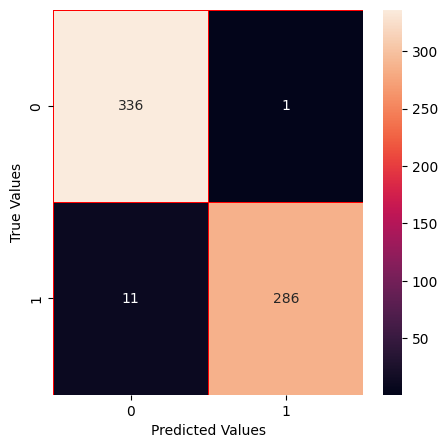

c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core

Min Score With HC for Number of Neighbors = 2: 52.208202
Max Score With HC for Number of Neighbors = 2: 100.000000
0.9810725552050473


In [14]:
KNN()
KNN_With_HC()
KNN_With_SA()

SUPPORT VECTOR MACHINE (SVM)

SVM 

In [16]:
def SVM():
    svm = SVC(random_state=42)
    svm.fit(x_train,y_train)
    print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))
    method_names.append("SVM")
    method_scores.append(svm.score(x_test,y_test))

    #Confusion Matrix
    y_pred = svm.predict(x_test)
    conf_mat = confusion_matrix(y_test,y_pred)
    #Visualization Confusion Matrix
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()

SVM WITH HC

In [17]:
def SVM_With_HC():
    min = 0
    max = 0
    svm = SVC(random_state=42)
    for i in range(0,1000):
        random_selected_column = random.choice(columns, randint(1 , 20))
        x_data = data.drop(["label"],axis=1)
        x = (x_data - np.min(x_data)) / (np.max(x_data)).values
        x = data[random_selected_column].values
        y = data.label.values
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
        if(len(x_train) != 0 and len(y_train) !=0):
            svm.fit(x_train,y_train)
            y_pred = svm.predict(x_test)
            score = svm.score(x_test,y_test)
            if(i == 0):
                min = score
                max = score
            if(score>max):
                max = score
            if(score<min):
                min=score
    method_names.append("SVM_HC")
    method_scores.append(max)
    print("Min SVM Classification Score is: %.6f" % (min*100))
    print("Max SVM Classification Score is: %.6f" % (max*100))

SVM WITH SA

In [18]:
def SVM_With_SA():
    def objective_function(solution):
        svm = SVC(random_state=42)
        if(sum(solution)==0):
            return 0
        svm.fit(x_train,y_train)
        score = svm.score(x_test, y_test)
        return score
        


    def neighborhood_function(solution, obj_val):
        neighbors = []
        for i in range(len(solution)):
            temp_sol = solution.copy()
            temp_sol[i] = ~temp_sol[i]
            if ( objective_function(temp_sol) < obj_val ):
                neighbors.append(temp_sol)
        if len(neighbors) == 0:
            return None
        rand_ind = np.random.randint(0, len(neighbors))
        return neighbors[rand_ind]
        


    initial_temp = 1
    cooling_coef = 0.8

    solution = np.random.rand(600)>0.5
    obj_val = objective_function(solution)

    best_solution = solution.copy()
    best_val = obj_val

    convergence = []
    for i in range(1000):
        candidate_solution = neighborhood_function(solution, obj_val)
        if candidate_solution is None:
            break
        cand_val = objective_function(candidate_solution)
        
        if(cand_val <obj_val ):
            obj_val, solution = cand_val, candidate_solution.copy()
            if(cand_val < best_val):
                best_val, best_solution = cand_val, candidate_solution.copy()
        else:
            if initial_temp/ ( 1 + np.log(i+1) ) > np.random.random():
                obj_val, solution = cand_val, candidate_solution.copy()
        convergence.append(best_val)
        
        
        
    method_names.append("SVM_SA")
    method_scores.append(best_val)    
    print(best_val)

SVM Classification Score is: 0.9842271293375394


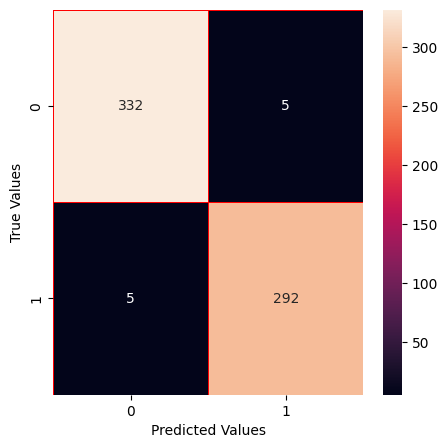

c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core

Min SVM Classification Score is: 50.788644
Max SVM Classification Score is: 100.000000
0.9842271293375394


In [19]:
SVM()
SVM_With_HC()
SVM_With_SA()

DECISION TREE

In [20]:
def DecisionTree():
    dec_tree = DecisionTreeClassifier()
    dec_tree.fit(x_train,y_train)
    print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))
    method_names.append("Decision Tree")
    method_scores.append(dec_tree.score(x_test,y_test))

    #Confusion Matrix
    y_pred = dec_tree.predict(x_test)
    conf_mat = confusion_matrix(y_test,y_pred)
    #Visualization Confusion Matrix
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
    plt.show()

DECISION TREE WITH HC

In [21]:
def DecisionTree_With_HC():
    min = 0
    max = 0
    dec_tree = DecisionTreeClassifier()
    for i in range(0,1000):
        random_selected_column = random.choice(columns, randint(1 , 20))
        x_data = data.drop(["label"],axis=1)
        x = (x_data - np.min(x_data)) / (np.max(x_data)).values
        x = data[random_selected_column].values
        y = data.label.values
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)
        if(len(x_train) != 0 and len(y_train) !=0):
            dec_tree.fit(x_train,y_train)
            y_pred = dec_tree.predict(x_test)
            score = dec_tree.score(x_test, y_test)
            #score = accuracy_score(y_test ,y_pred)
            if(i == 0):
                min = score
                max = score
            if(score>max):
                max = score
            if(score<min):
                min=score
    method_names.append("Decision Tree_HC")
    method_scores.append(max)
    print("Min Decision Tree With HC Classification Score: %.6f " %(min*100))
    print("Max Decision Tree With HC Classification Score: %.6f " %(max*100))

DECISION TREE WITH SA

In [22]:
def DecisionTree_With_SA():
    def objective_function(solution):
        dec_tree = DecisionTreeClassifier()
        if(sum(solution)==0):
            return 0
        dec_tree.fit(x_train,y_train)
        score = dec_tree.score(x_test, y_test)
        return score
        


    def neighborhood_function(solution, obj_val):
        neighbors = []
        for i in range(len(solution)):
            temp_sol = solution.copy()
            temp_sol[i] = ~temp_sol[i]
            if ( objective_function(temp_sol) < obj_val ):
                neighbors.append(temp_sol)
        if len(neighbors) == 0:
            return None
        rand_ind = np.random.randint(0, len(neighbors))
        return neighbors[rand_ind]
        


    initial_temp = 1
    cooling_coef = 0.8

    solution = np.random.rand(600)>0.5
    obj_val = objective_function(solution)

    best_solution = solution.copy()
    best_val = obj_val

    convergence = []
    for i in range(1000):
        candidate_solution = neighborhood_function(solution, obj_val)
        if candidate_solution is None:
            break
        cand_val = objective_function(candidate_solution)
        
        if(cand_val <obj_val ):
            obj_val, solution = cand_val, candidate_solution.copy()
            if(cand_val < best_val):
                best_val, best_solution = cand_val, candidate_solution.copy()
        else:
            if initial_temp/ ( 1 + np.log(i+1) ) > np.random.random():
                obj_val, solution = cand_val, candidate_solution.copy()
        convergence.append(best_val)
        
        
        
        
    print(best_val)

Decision Tree Classification Score:  0.9700315457413249


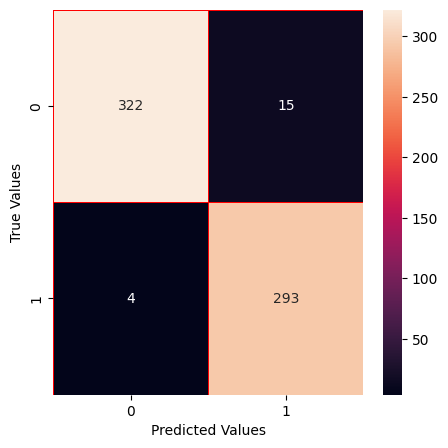

c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dogukan\Desktop\DERSLER\BM SON SINIF\YAPAY ZEKA\FinalOdev\Gender-Classification-by-Machine-Learning-Tecniques\.yzFinalOdev\Lib\site-packages\numpy\core

Min Decision Tree With HC Classification Score: 50.157729 
Max Decision Tree With HC Classification Score: 100.000000 
0.9558359621451105


In [23]:
DecisionTree()
DecisionTree_With_HC()
DecisionTree_With_SA()

Text(0, 0.5, 'Method Score')

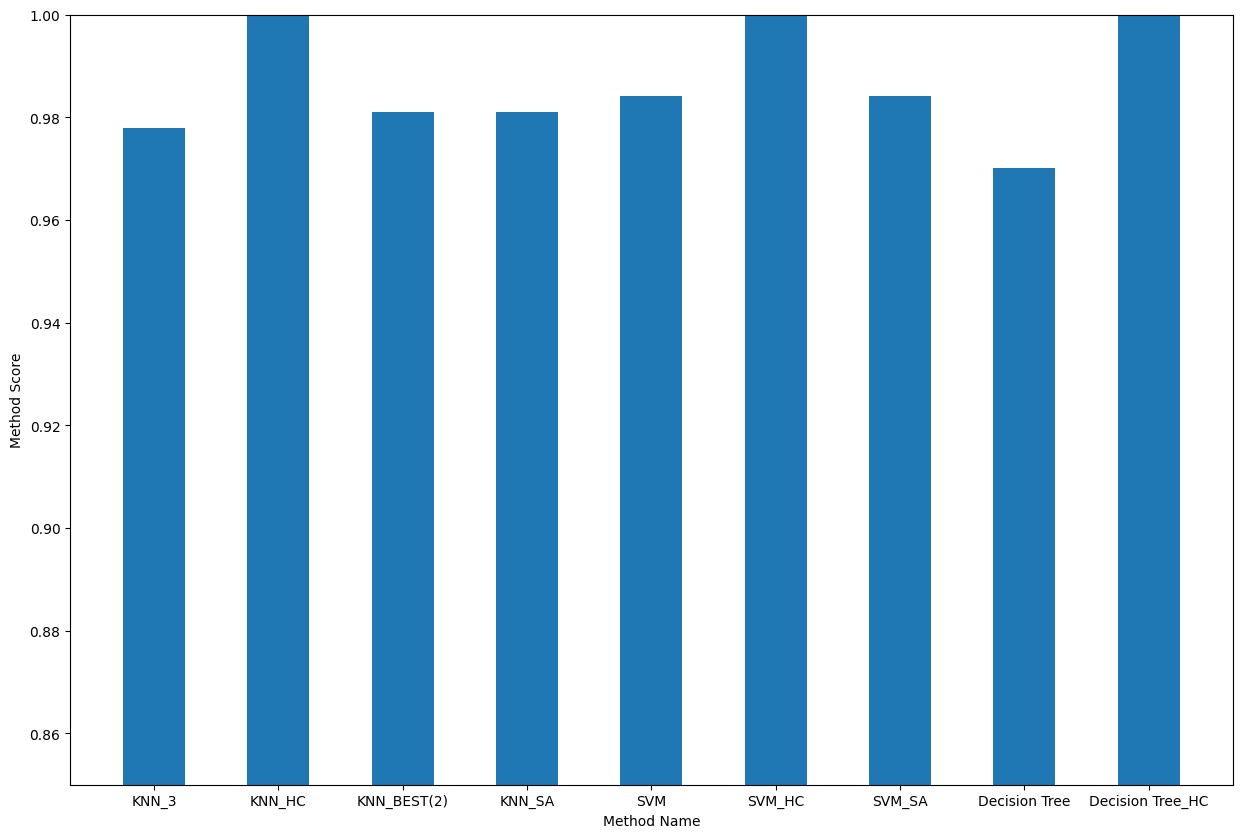

In [24]:
plt.figure(figsize=(15,10))
plt.ylim([0.85,1])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')